## Figure 4: Scatter / correlations (Fairness and Color Split vs performance)

*Last update: 2022-04-26*


In [1]:
import pandas as pd
import numpy as np
import os
import json
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from pathlib import Path
from scipy.stats import linregress
import importlib

from trial import Trial
from util import dist
from constants import COND_LABELS, FS, DV_LABELS
import plots
import analysis_helper

importlib.reload(plots)
importlib.reload(analysis_helper)

plt.style.use('./jg.mplstyle')

### Load data

In [2]:
df_trials = pd.read_pickle('../data/df_trials_v4.pickle')

In [3]:
# Drop practice
df_trials = df_trials[df_trials.practice == 0]

In [4]:
df_trials.goal_color_split = df_trials.goal_color_split.astype(float)

m=1.12 (r=0.481, p=0.017)
m=0.75 (r=0.412, p=0.045)


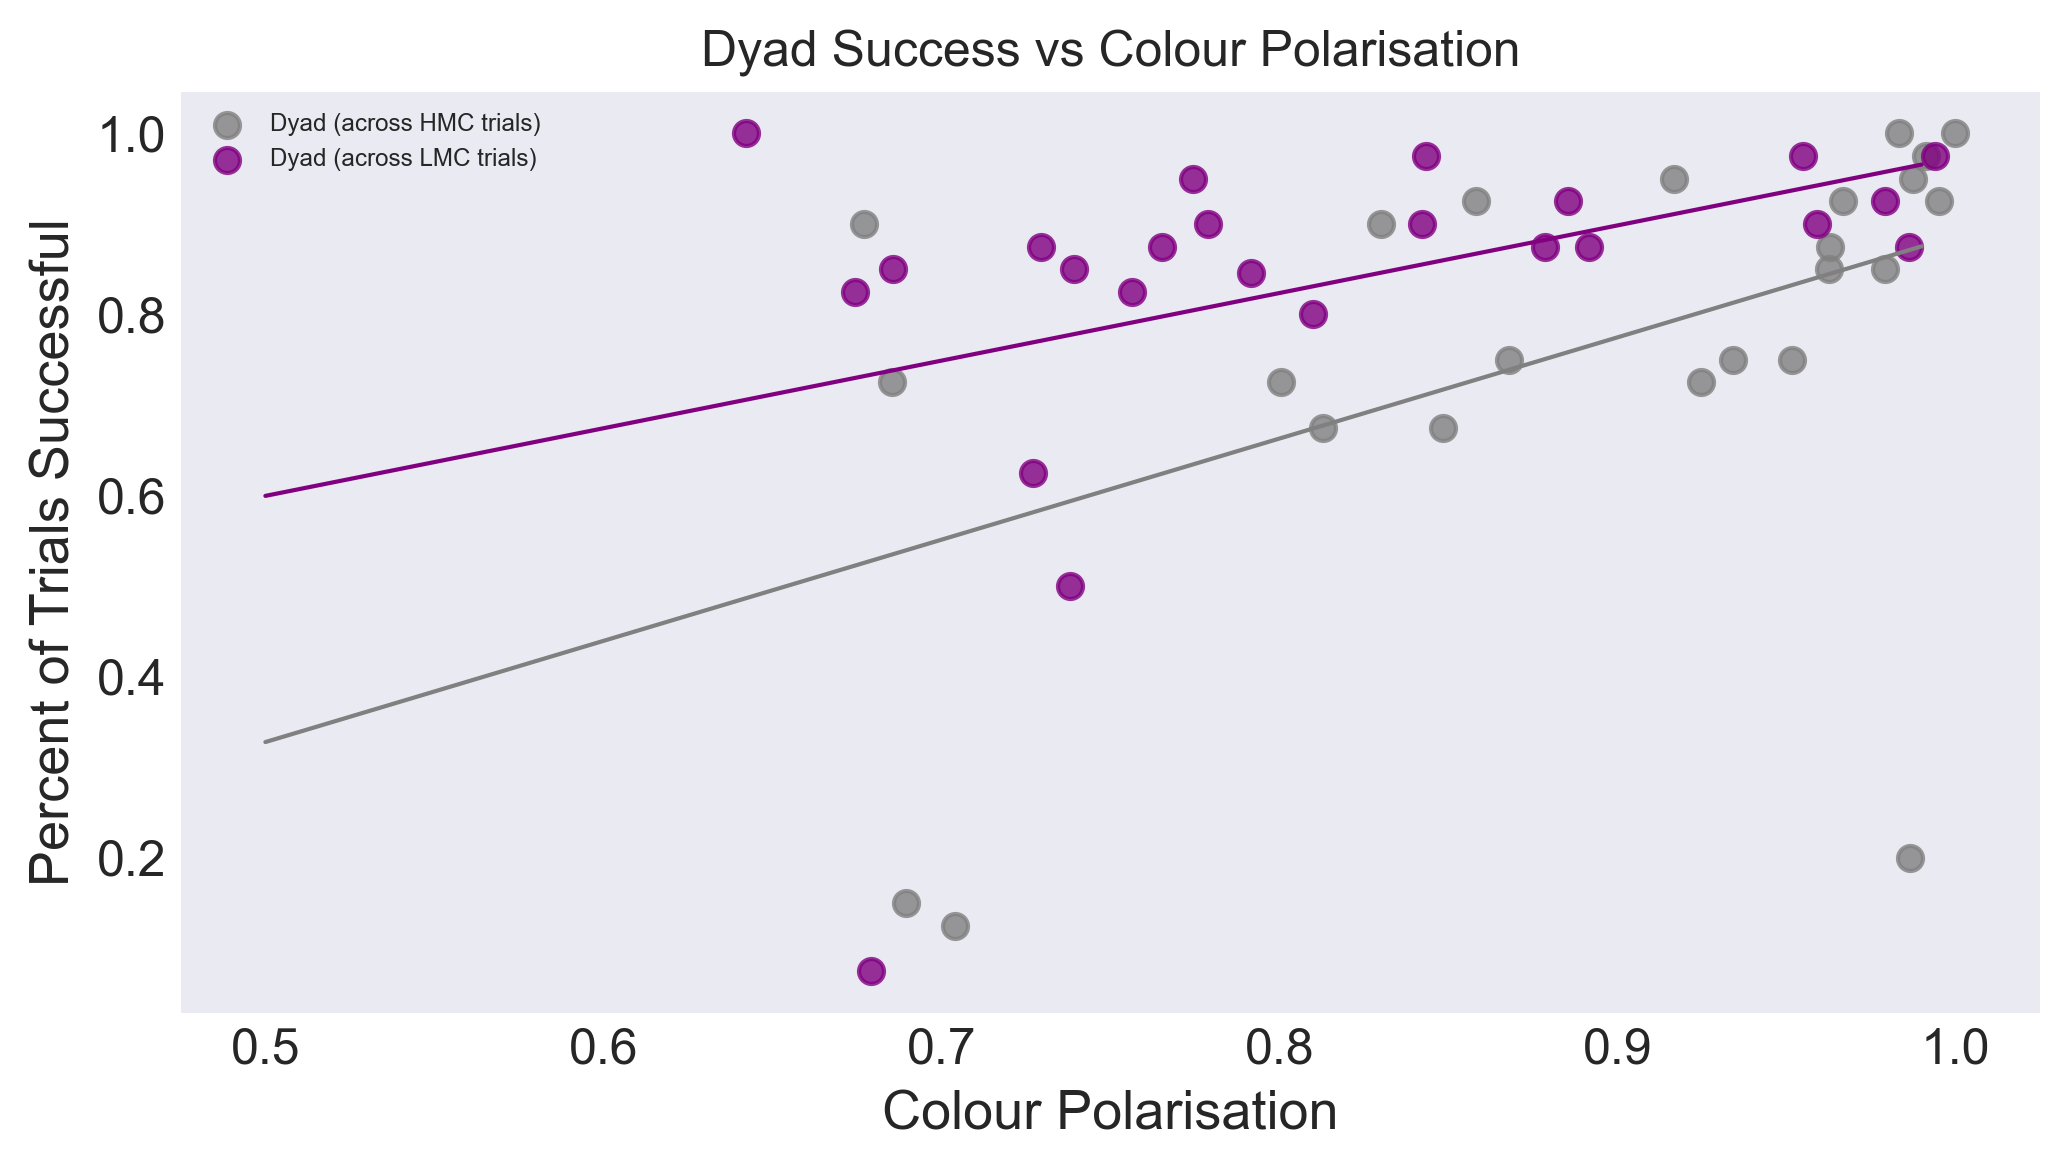

In [5]:
tx = 0.55
ybuff = 0.05
ALPHA = 0.8
show_yerr = False

df_hmc = df_trials[df_trials.cond_count == "G"]
df_lmc = df_trials[df_trials.cond_count == "C"]

grouped_hmc = df_hmc.groupby('match_nick')[['goal_color_split', 'successful']]
grouped_lmc = df_lmc.groupby('match_nick')[['goal_color_split', 'successful']]
grouped_hmc_mean = grouped_hmc.mean()
grouped_lmc_mean = grouped_lmc.mean()
xaxis = np.arange(0.5, 1, 0.01)

fig, ax = plt.subplots(1, 1, dpi=300)
ax.scatter(grouped_hmc_mean.goal_color_split, grouped_hmc_mean.successful, color="gray", label="Dyad (across HMC trials)", alpha=ALPHA)
if show_yerr:
    ax.errorbar(grouped_hmc_mean.goal_color_split, grouped_hmc_mean.successful, yerr=grouped_hmc.std()['successful'], color="gray")
m, b, r, p, _ = linregress(grouped_hmc_mean.goal_color_split, grouped_hmc_mean.successful)
cap1 = "m=%.2f (r=%.3f, p=%.3f)" % (m, r, p)
print(cap1)
# ax.text(tx, m*tx+b - ybuff, cap1, color="gray")
ax.plot(xaxis, m*xaxis + b, c='gray')

ax.scatter(grouped_lmc_mean.goal_color_split, grouped_lmc_mean.successful, color="purple", label="Dyad (across LMC trials)", alpha=ALPHA)
if show_yerr:
    ax.errorbar(grouped_lmc_mean.goal_color_split, grouped_lmc_mean.successful, yerr=grouped_lmc.std()['successful'], color="purple")
m, b, r, p, _ = linregress(grouped_lmc_mean.goal_color_split, grouped_lmc_mean.successful)
cap2 = "m=%.2f (r=%.3f, p=%.3f)" % (m, r, p)
print(cap2)
# ax.text(tx, m*tx+b - ybuff, cap2, color="purple")
ax.plot(xaxis, m*xaxis + b, c='purple')

ax.set_xlabel("Colour Polarisation")
ax.set_ylabel("Percent of Trials Successful")
ax.set_title("Dyad Success vs Colour Polarisation")
xaxis = np.arange(0.5, 1, 0.01)
plt.legend()
plt.tight_layout()
plt.savefig("./out/dyad_success_pol_scatter.png")
plt.show()